In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


```
Dataset name : english_cleaned_lyrics.csv
The attributes are : 
Unnamed 0 : This attribute is of no value to us.
Index : This attribute contains the index no. for each record.
Song : This attribute contains the name of the song.
Year : This attribute contains the year the song was released.
Artist : This attribute contains the name of the artist of the song.
Lyrics : This attribute contains the lyrics of the song.
Genre : This attribute specifies the genre of the song. This is the target variable.

Aim of project : Song Genre Classification and 
                Quantitative Sentiment Analysis of Lyrics in Popular Music

ML Task Type : Classification.
```

In [ ]:
# Path of dataset
path = "/content/drive/MyDrive/english_cleaned_lyrics.csv"

In [ ]:
# Importing required modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

```
Dataset Loading and Preprocessing
```

In [ ]:
# Loading csv into df
df=pd.read_csv(path)             
df.head()

Unnamed: 0  index  ... genre                                             lyrics
0           0      0  ...   Pop  Oh baby how you doing You know I'm gonna cut r...
1           1      1  ...   Pop  playin everything so easy it's like you seem s...
2           2      2  ...   Pop  If you search For tenderness It isn't hard to ...
3           3      3  ...   Pop  Oh oh oh I oh oh oh I If I wrote a book about ...
4           4      4  ...   Pop  Party the people the people the party it's pop...

[5 rows x 7 columns]

In [ ]:
# Deleting columns - Unnamed:0 and index
del df['Unnamed: 0']  
del df['index']                 
df.head()

song  ...                                             lyrics
0        ego-remix  ...  Oh baby how you doing You know I'm gonna cut r...
1     then-tell-me  ...  playin everything so easy it's like you seem s...
2          honesty  ...  If you search For tenderness It isn't hard to ...
3  you-are-my-rock  ...  Oh oh oh I oh oh oh I If I wrote a book about ...
4    black-culture  ...  Party the people the people the party it's pop...

[5 rows x 5 columns]

In [ ]:
# Checking if there is any null value in the dataset
df.isnull().any(axis = 1).sum()

0

In [ ]:
# Total no. of records in the dataset 
print("Total no. of records in the dataset are :",len(df))

Total no. of records in the dataset are : 218209


In [ ]:
# Converting all the lyrics & titles to lowercase
df['lyrics'] = df['lyrics'].str.lower()
df['song'] = df['song'].str.lower()
df.head()

song  ...                                             lyrics
0        ego-remix  ...  oh baby how you doing you know i'm gonna cut r...
1     then-tell-me  ...  playin everything so easy it's like you seem s...
2          honesty  ...  if you search for tenderness it isn't hard to ...
3  you-are-my-rock  ...  oh oh oh i oh oh oh i if i wrote a book about ...
4    black-culture  ...  party the people the people the party it's pop...

[5 rows x 5 columns]

In [ ]:
# Diplaying no. of unique artists and genres in the dataset
artist_unique = df['artist'].unique()
print("Total no. of unique artists present in dataset :",len(artist_unique))
for i in range(len(artist_unique)):
  if i != len(artist_unique) - 1 :
    print(artist_unique[i],",",end=" ")
  else :
    print(artist_unique[i]) 

genre_unique = df['genre'].unique()
print("\nTotal no. of unique genres present in dataset :",len(genre_unique))
for i in range(len(genre_unique)):
  if i != len(genre_unique) - 1 :
    print(genre_unique[i],",",end=" ")
  else :
    print(genre_unique[i]) 

Total no. of unique artists present in dataset : 10431
beyonce-knowles , eazy-e , asher-monroe , alice-on-the-roof , borialis , demonaz , dave-sterling , brightwood , cenk-r-lr-etin , destroy , gene-watson , bobby-charles , a-dream-too-late , fang , anna-waronker , the-books , alathea , graveyard , chant , arcade-fire , funkadelic , arthur-big-boy-crudup , chuckie , brian-simpson , asia-nitollano , children-18-3 , evan-taubenfeld , exit-this-side , brandi-carlile , echoterra , b3 , club-america , billy-bland , chad-brownlee , aubrie-sellers , beckett , the-easton-ellises , eljay , capleton , dead-ceremony , fatima-mansions , gei , andy-m-stewart , flamboyant-bella , claypool-lennon-delirium , earthtone9 , coconut-sunday , dreadful-shadows , the-boy-least-likely-to , c-w-stoneking , genghis-tron , desert-noises , al-stewart , the-colors , all-caps , capture-the-crown , busy-signal , atreyu , bless-the-fall , del-the-funky-homosapien , 8mm , dnl , gluecifer , dear-stalker , the-explosion

In [ ]:
# Tokenisation and removing stop words
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
l = []
stop_words = set(stopwords.words('english')) 
for i in df.index:
  sentence = df.loc[i,'lyrics']
  word_tokens = word_tokenize(sentence)
  filtered_sentence = [w for w in word_tokens if not w in stop_words]
  l.append(filtered_sentence)

df['token_lyrics'] = l
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


song  ...                                       token_lyrics
0        ego-remix  ...  [oh, baby, know, 'm, gon, na, cut, right, chas...
1     then-tell-me  ...  [playin, everything, easy, 's, like, seem, sur...
2          honesty  ...  [search, tenderness, n't, hard, find, love, ne...
3  you-are-my-rock  ...  [oh, oh, oh, oh, oh, oh, wrote, book, stand, t...
4    black-culture  ...  [party, people, people, party, 's, popping, si...

[5 rows x 6 columns]

In [ ]:
# Stemming
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stems = []
for i in df.index:
  l = []   
  for t in df.loc[i,'token_lyrics'] :
    l.append(porter.stem(t))
  stems.append(l)

df['stemmed_tokenized_lyrics'] = stems
df.head()

song  ...                           stemmed_tokenized_lyrics
0        ego-remix  ...  [oh, babi, know, 'm, gon, na, cut, right, chas...
1     then-tell-me  ...  [playin, everyth, easi, 's, like, seem, sure, ...
2          honesty  ...  [search, tender, n't, hard, find, love, need, ...
3  you-are-my-rock  ...  [oh, oh, oh, oh, oh, oh, wrote, book, stand, t...
4    black-culture  ...  [parti, peopl, peopl, parti, 's, pop, sit, aro...

[5 rows x 7 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

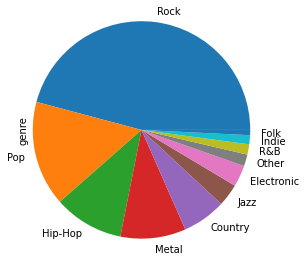

In [ ]:
# Showing a pie-chart of all the genres in the dataset
df['genre'].value_counts().plot.pie(radius=1.25)
from google.colab import files
plt.savefig("genre_pie_chart.pdf")
files.download("genre_pie_chart.pdf") 

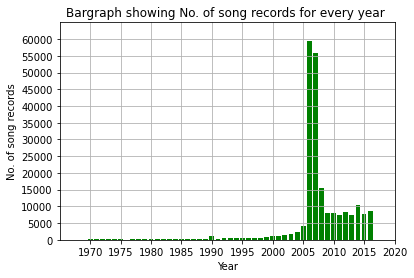

In [ ]:
# Bargraph showing No. of song records for every year 
freq = []
year = df['year'].unique()
year.sort()
for i in year :
  freq.append(len(df[df['year']==i])) 
plt.bar(year,freq,color="green")
plt.title("Bargraph showing No. of song records for every year ")
plt.xlabel("Year")
plt.ylabel("No. of song records")
plt.axis([1965,2020,0,65000])
plt.xticks(np.arange(1970, 2021, 5))
plt.yticks(np.arange(0, 65000, 5000))
plt.grid(True)
plt.show()

Lemmatization of Lyrics and Song titles

In [ ]:
# Song-titles -  converted to list of words
titles = []
for i in df.index :
  titles.append(df.loc[i,'song'].split("-"))
df['song_title_tokenised'] = titles
df.head(10)

song  ...           song_title_tokenised
0               ego-remix  ...                   [ego, remix]
1            then-tell-me  ...               [then, tell, me]
2                 honesty  ...                      [honesty]
3         you-are-my-rock  ...           [you, are, my, rock]
4           black-culture  ...               [black, culture]
5  all-i-could-do-was-cry  ...  [all, i, could, do, was, cry]
6      once-in-a-lifetime  ...        [once, in, a, lifetime]
7                 waiting  ...                      [waiting]
8               slow-love  ...                   [slow, love]
9   why-don-t-you-love-me  ...   [why, don, t, you, love, me]

[10 rows x 8 columns]

In [ ]:
# Required libraries for lemmatization
!pip install pattern
import pattern
from pattern.en import lemma, lexeme

     |████████████████████████████████| 22.2 MB 34.6 MB/s 
     |████████████████████████████████| 88 kB 8.2 MB/s 
     |████████████████████████████████| 81 kB 9.6 MB/s 
     |████████████████████████████████| 5.6 MB 50.2 MB/s 
     |████████████████████████████████| 5.6 MB 21.2 MB/s 
     |████████████████████████████████| 419 kB 49.3 MB/s 
     |████████████████████████████████| 97 kB 7.0 MB/s 
     |████████████████████████████████| 3.2 MB 13.7 MB/s 
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332722 sha256=2d2618dea77741d891c367efbc212d12cac2012add5e8a68cda1e86662ebcca4
  Stored in directory: /root/.cache/pip/wheels/8d/1f/4e/9b67afd2430d55dee90bd57618dd7d899f1323e5852c465682
  Created wheel for mysqlclient: filename=mysqlclient-2.0.3-cp37-cp37m-linux_x86_64.whl size=100132 sha256=18e8480bdbca5b248b79adb8d8a1befc4d120d8c4ec3a48c301fd20461e8f25b
  Stored in directory: /root/.cache/pip/wheels/79/1c/f8/11fafab45fe6696eea63794a5d747b9c6b54990ac6f1885fb7
  

In [ ]:
# Lemmatizing song titles and adding it as a new column
Lemmatized_titles = []
for i in df.index :
  s = df.loc[i,'song_title_tokenised']
  if len(s) <= 1 :
    s = [lemma(wd) for wd in s ]
    s = s[0]
  else :
    s = " ".join([lemma(wd) for wd in s ])
  Lemmatized_titles.append(s)
df['lemmatized_song_titles'] = Lemmatized_titles
df.head(20)

song  ...  lemmatized_song_titles
0                ego-remix  ...               ego remix
1             then-tell-me  ...            then tell me
2                  honesty  ...                 honesty
3          you-are-my-rock  ...          you be my rock
4            black-culture  ...           black culture
5   all-i-could-do-was-cry  ...     all i can do be cry
6       once-in-a-lifetime  ...      once in a lifetime
7                  waiting  ...                    wait
8                slow-love  ...               slow love
9    why-don-t-you-love-me  ...   why don t you love me
10           save-the-hero  ...           save the hero
11               telephone  ...               telephone
12         ice-cream-truck  ...         ice cream truck
13  no-broken-hearted-girl  ...     no break heart girl
14                 control  ...                 control
15           i-m-alone-now  ...           i m alone now
16                  poison  ...                  poison
17        world-wide-women  ...        world wide women
18          beautiful-liar  ...          beautiful liar
19  beautiful-liar-spanish  ...  beautiful liar spanish

[20 rows x 9 columns]

In [ ]:
# Lemmatizing lyrics
Lemmatized_lyrics = []
for i in df.index :
  s = df.loc[i,'token_lyrics']
  s = " ".join([lemma(wd) for wd in s ])
  Lemmatized_lyrics.append(s)
df['lemmatized_lyrics'] = Lemmatized_lyrics
df.head(20)

song  ...                                  lemmatized_lyrics
0                ego-remix  ...  oh baby know be gon na cut right chase women m...
1             then-tell-me  ...  playin everythe easy be like seem sure still w...
2                  honesty  ...  search tendernes be hard find love need live l...
3          you-are-my-rock  ...  oh oh oh oh oh oh write book stand title book ...
4            black-culture  ...  party people people party be pop sit around se...
5   all-i-could-do-was-cry  ...  hear church bell ring hear choir sing see love...
6       once-in-a-lifetime  ...  another day would spend waitin right one stare...
7                  waiting  ...  wait wait wait wait wait wait wait wait wait w...
8                slow-love  ...  read magazine wait around say can be wait see ...
9    why-don-t-you-love-me  ...  n n honey better sit look around 'cause must h...
10           save-the-hero  ...  lay alone awake night sorrow fill eye be stron...
11               telephone  ...  hello hello baby call ca be hear thing get ser...
12         ice-cream-truck  ...  feel like be lose mind love hard find lead bel...
13  no-broken-hearted-girl  ...  youre everythe think never nothe like think co...
14                 control  ...  get ta give quite storm rage inside way hit da...
15           i-m-alone-now  ...  really hurt say ye sweet love ai be enough man...
16                  poison  ...  be bad clearly get be see somethe good can com...
17        world-wide-women  ...  be world wide woman www log anywhere be girl t...
18          beautiful-liar  ...  ay ay ay nobody like play oh beyonce beyonce o...
19  beautiful-liar-spanish  ...  ay ay nobody like play ay oh beyonc beyonc oh ...

[20 rows x 10 columns]

Further Dataset Analysis and Visualisation

In [ ]:
# Finding unique stemmed tokenised words in lyrics of each song and saving it as a new column
#del df['uniquewords']
def unique(list1):
   # for any list of strings, return a list of unique words
     unique_list = []
     for x in list1:
         if x not in unique_list:
              unique_list.append(x)
     return unique_list

masterList = []
for i in df.index:
    lemma_lyr = df.loc[i,'lemmatized_lyrics']
    lemma_lyr = lemma_lyr.split()
    masterList.append(unique(lemma_lyr))

df['uniquewords'] = masterList
df.head()

song  ...                                        uniquewords
0        ego-remix  ...  [oh, baby, know, be, gon, na, cut, right, chas...
1     then-tell-me  ...  [playin, everythe, easy, be, like, seem, sure,...
2          honesty  ...  [search, tendernes, be, hard, find, love, need...
3  you-are-my-rock  ...  [oh, write, book, stand, title, would, ``, lif...
4    black-culture  ...  [party, people, be, pop, sit, around, see, loo...

[5 rows x 11 columns]

In [ ]:
# Creating a subset of the dataset for further analysis and visulaization
df_sample = {}
df_subset = pd.DataFrame()
for i in genre_unique :
  df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
  df_sample[i] = df_sample[i][:55]
  df_subset = pd.concat([df_sample[i],df_subset])
  df_subset = df_subset.sample(frac=1)
df_subset = df_subset.reset_index(drop=True)
print("No. of records in smaller sample = ",len(df_subset))
df_subset.head()

No. of records in smaller sample =  605


song  ...                                        uniquewords
0              money-for-nothing  ...  [people, tell, day-dream, waste, time, ohh, be...
1                       six-pack  ...  [check, six, pack, whoa, love, let, be, grab, ...
2            building-as-foreign  ...  [end, start, amaze, humble, backyard, brawl, s...
3                  dream-a-dream  ...  [hooh, one, time, be, back, new, rhyme, hey, g...
4  i-know-a-dream-when-i-see-one  ...  [know, dream, see, one, be, dreamer, hold, min...

[5 rows x 11 columns]

In [ ]:
df['uniquewords']

0         [oh, baby, know, be, gon, na, cut, right, chas...
1         [playin, everythe, easy, be, like, seem, sure,...
2         [search, tendernes, be, hard, find, love, need...
3         [oh, write, book, stand, title, would, ``, lif...
4         [party, people, be, pop, sit, around, see, loo...
                                ...                        
218204    [get, ta, say, boy, couple, date, be, hand, ou...
218205    [help, find, diamond, ring, make, try, everyth...
218206    [look, couple, corner, booth, lot, like, be, w...
218207    [fly, mortal, earth, be, measure, depth, girth...
218208    [hear, friend, finally, get, rid, girlfriend, ...
Name: uniquewords, Length: 218209, dtype: object

In [ ]:
#Create a new dataframe of all the  words used in lyrics and its genre and showing frequency of words in each genre
from sklearn.feature_extraction.text import CountVectorizer
#list used to store the information
set_uniquewords = []
set_genres = []

#Iterate through each word and genre and stores them into the new lists
for i in df_subset.index:
    for word in df_subset.loc[i,'uniquewords']:
        set_uniquewords.append(word)
        set_genres.append(df_subset.loc[i,'genre'])
        
#create the new data frame  with the information of words and genre lists
words_data = pd.DataFrame({'uniquewords':set_uniquewords,'genre':set_genres})

# count the frequency of each word that aren't on the stop_words lists
cv = CountVectorizer(stop_words=stop_words)

#Create a dataframe called data_cv to store the the number of times the word was used in  a lyric based their genre
text_cv = cv.fit_transform(words_data['uniquewords'].iloc[:])
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names())
data_cv['genre'] = words_data['genre']

#created a dataframe that Sums the ocurrence frequency of each word and group the result by genre
vect_words = data_cv.groupby('genre').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'uniquewords'})
vect_words = vect_words.rename_axis(columns='')

#Save the data into a csv file
vect_words.to_csv('uniquewords.csv',index=False)

#change the order of columns to a specific order
vect_words = vect_words[['uniquewords','Rock','Pop','Hip-Hop','Metal','Country','Jazz','Electronic','Other','Indie','R&B','Folk']]

vect_words

uniquewords  Rock  Pop  Hip-Hop  ...  Other  Indie  R&B  Folk
0             06     0    0        0  ...      0      0    0     1
1             09     0    0        1  ...      0      0    0     0
2             10     2    0        2  ...      0      0    0     0
3            100     0    1        3  ...      1      0    0     0
4            107     0    0        1  ...      0      0    0     0
...          ...   ...  ...      ...  ...    ...    ...  ...   ...
6574         zip     0    0        1  ...      0      0    1     0
6575      zombie     0    0        0  ...      0      0    0     0
6576        zone     0    0        1  ...      0      0    1     0
6577         zoo     1    0        0  ...      0      0    0     0
6578        zora     0    0        1  ...      0      0    0     0

[6579 rows x 12 columns]

In [ ]:
# Creating wordclouds
!pip install wordcloud

<Figure size 432x288 with 0 Axes>

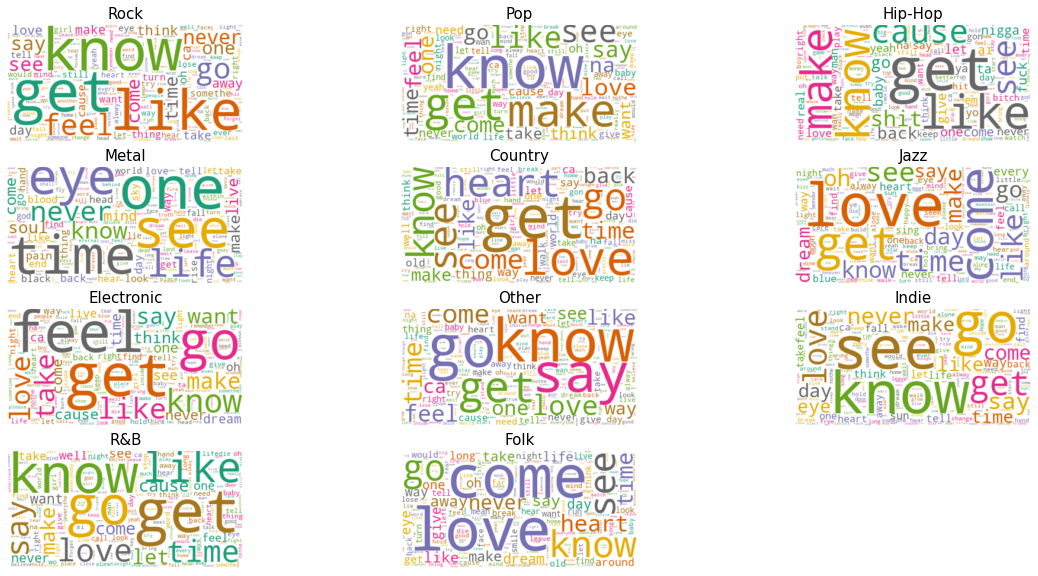

In [ ]:
from wordcloud import WordCloud 
def plot_wordcloud(df_subset,row,col):
    wc = WordCloud(background_color="white",colormap="Dark2",max_font_size=100,random_state=15)
    fig = plt.figure(figsize=(20,10))
     
    for index, value in enumerate(df_subset.columns[1:]):
        top_dict = dict(zip(df_subset['uniquewords'].tolist(),df_subset[value].tolist()))
        wc.generate_from_frequencies(top_dict)
        plt.subplot(row,col,index+1)
        plt.imshow(wc,interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{value}",fontsize=15)
        
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

#Plot the word cloud
plot_wordcloud(vect_words,4,3)

In [ ]:
# crashes with the entire data - try doing one task per loop


# Genre-wise word statistics of subset of dataset 
def words_stats(df_subset,main_data):
    unique_words = []
    total_words = []
    total_news = []
    genres = []
    
    for value in df_subset.columns[1:]:
        unique_words.append(np.count_nonzero(df_subset[value]))
        total_words.append(sum(df_subset[value]))
        genres.append(str(value))
        total_news.append(main_data['genre'][main_data['genre']==value].count())

    myData = pd.DataFrame({'genre':genres,'unique words':unique_words,'total words':total_words,'total songs':total_news})

    myData['words per songs'] = round(myData['total words'] / myData['total songs'],0)

    myData['words per songs'] = myData['words per songs'].astype('int')

    return myData

#display the table of statistics
words_stats(vect_words,df_subset)

genre  unique words  total words  total songs  words per songs
0         Rock          1220         2794           55               51
1          Pop          1244         3162           55               57
2      Hip-Hop          3224         8225           55              150
3        Metal          1638         3169           55               58
4      Country          1168         2795           55               51
5         Jazz          1079         2258           55               41
6   Electronic          1033         2212           55               40
7        Other          1203         2825           55               51
8        Indie          1239         2837           55               52
9          R&B          1223         3041           55               55
10        Folk          1502         3200           55               58

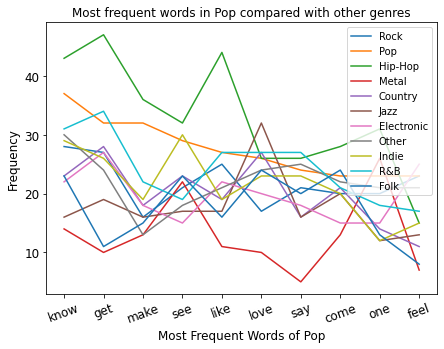

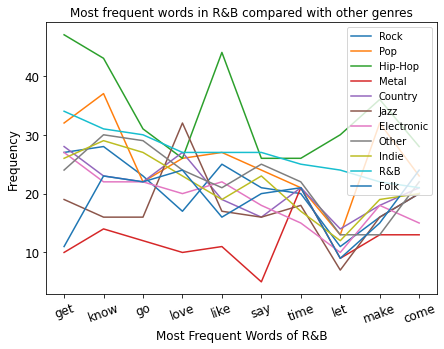

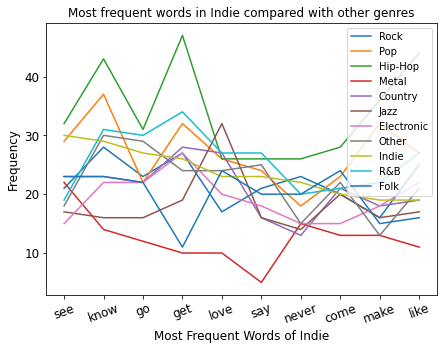

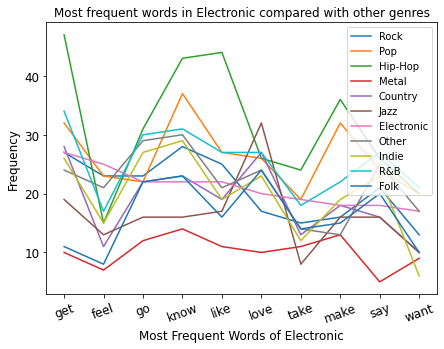

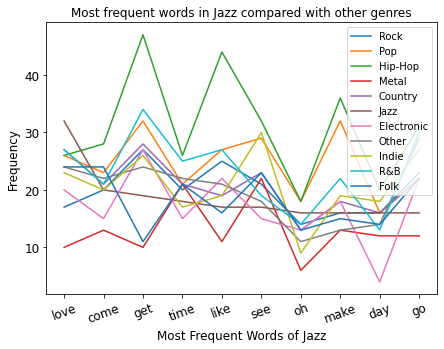

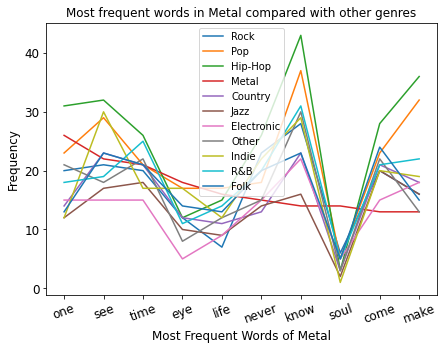

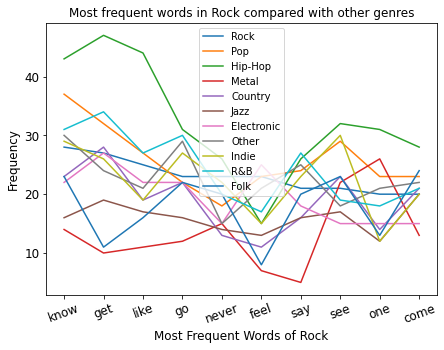

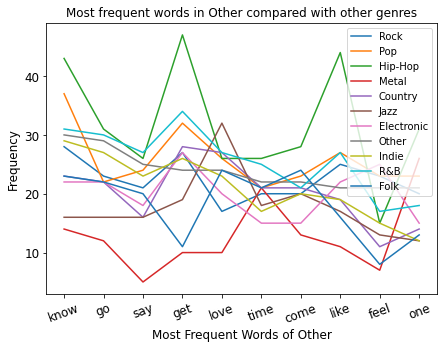

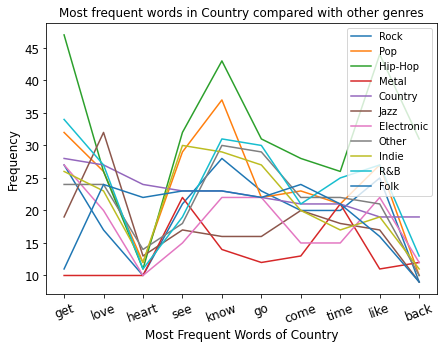

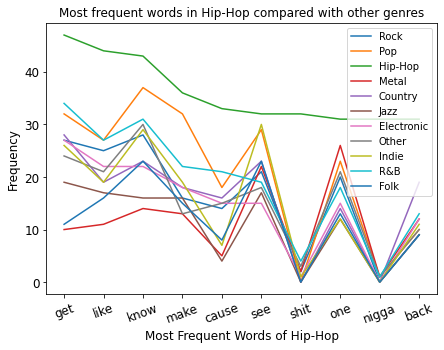

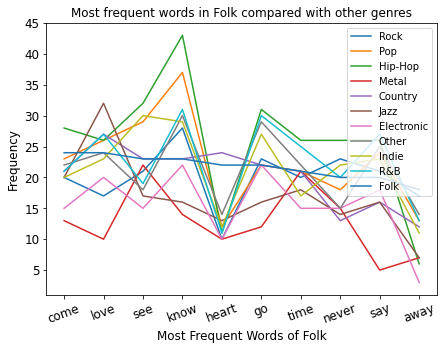

In [ ]:
#Most frequent words in one genre compared with other genres
def plot_freq_words(df_subset,genre,n_words):
    top_words_2020 = df_subset.sort_values([genre],ascending=False).head(n_words)
    #print(top_words_2020)
    fig = plt.figure(figsize=(7,5))
    for i in range(1,12):
        plt.plot(top_words_2020['uniquewords'],top_words_2020[df_subset.columns[i]])
    plt.legend(df_subset.columns[1:].tolist())
    plt.title(f"Most frequent words in {genre} compared with other genres",fontsize=12)
    plt.xlabel(f'Most Frequent Words of {genre}',fontsize=12)
    plt.ylabel('Frequency',fontsize=12)
    plt.xticks(fontsize=12,rotation=20)
    plt.yticks(fontsize=12)
    plt.show()

#Ploting the comparison plot 
for i in df_subset['genre'].unique() : 
  plot_freq_words(vect_words,i,10)

**Importing Required Libraries & Loading dataset**

In [ ]:
# Importing required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading csv into df
df=pd.read_csv("/content/drive/MyDrive/Final AI Project/Dataset/sample_df.csv")   
df.head()

Unnamed: 0             song  year           artist genre  \
0           0        ego-remix  2009  beyonce-knowles   Pop   
1           1     then-tell-me  2009  beyonce-knowles   Pop   
2           2          honesty  2009  beyonce-knowles   Pop   
3           3  you-are-my-rock  2009  beyonce-knowles   Pop   
4           4    black-culture  2009  beyonce-knowles   Pop   

                                              lyrics  \
0  oh baby how you doing you know i'm gonna cut r...   
1  playin everything so easy it's like you seem s...   
2  if you search for tenderness it isn't hard to ...   
3  oh oh oh i oh oh oh i if i wrote a book about ...   
4  party the people the people the party it's pop...   

                                        token_lyrics  \
0  ['oh', 'baby', 'know', "'m", 'gon', 'na', 'cut...   
1  ['playin', 'everything', 'easy', "'s", 'like',...   
2  ['search', 'tenderness', "n't", 'hard', 'find'...   
3  ['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...   
4  ['party', 'people', 'people', 'party', "'s", '...   

                            stemmed_tokenized_lyrics  \
0  ['oh', 'babi', 'know', "'m", 'gon', 'na', 'cut...   
1  ['playin', 'everyth', 'easi', "'s", 'like', 's...   
2  ['search', 'tender', "n't", 'hard', 'find', 'l...   
3  ['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...   
4  ['parti', 'peopl', 'peopl', 'parti', "'s", 'po...   

           song_title_tokenised lemmatized_song_titles  \
0              ['ego', 'remix']              ego remix   
1        ['then', 'tell', 'me']           then tell me   
2                   ['honesty']                honesty   
3  ['you', 'are', 'my', 'rock']         you be my rock   
4          ['black', 'culture']          black culture   

                                   lemmatized_lyrics  \
0  oh baby know be gon na cut right chase women m...   
1  playin everythe easy be like seem sure still w...   
2  search tendernes be hard find love need live l...   
3  oh oh oh oh oh oh write book stand title book ...   
4  party people people party be pop sit around se...   

                                         uniquewords  sentence_count  \
0  ['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...             229   
1  ['playin', 'everythe', 'easy', 'be', 'like', '...             129   
2  ['search', 'tendernes', 'be', 'hard', 'find', ...              82   
3  ['oh', 'write', 'book', 'stand', 'title', 'wou...             264   
4  ['party', 'people', 'be', 'pop', 'sit', 'aroun...             189   

   char_count  unique words  no_of_contractions  \
0         864           229                   0   
1         548           129                   3   
2         400            82                   0   
3         980           264                   0   
4         757           189                   0   

                                     expanded_lyrics  
0  oh baby know be gon na cut right chase women m...  
1  playin everythe easy be like seem sure still w...  
2  search tendernes be hard find love need live l...  
3  oh oh oh oh oh oh write book stand title book ...  
4  party people people party be pop sit around se...

**Preparing Train and Test Data**

In [ ]:
df.fillna("",inplace=True)
df.isna().sum().sum()

0

In [ ]:
# extracting the required columns
X = df['expanded_lyrics']
Y = df['genre']

# splitting the data in train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [ ]:
#starting text processing with vectorizer 
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# using bag of words by applying the function and fit the data into it
bag_of_words_transformer = CountVectorizer().fit(X_train)
lyrics_bag_of_words = bag_of_words_transformer.transform(X_train)

In [ ]:
print(lyrics_bag_of_words.shape)

(185477, 136955)


In [ ]:
print(bag_of_words_transformer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00', '000', '000k', '000lb', '001', '003', '004', '006', '007', '00765', '009', '01', '010', '011', '012', '0161', '01715599', '02', '020', '024', '03', '033', '037', '04', '044200', '05', '052645', '05946', '06', '060', '061', '062', '064', '07', '070', '074', '076', '07981', '08', '08am', '09', '094', '09pm', '0and', '0bactivate', '0bit', '0blord', '0breligiou', '0h', '0hhhhhhhhh', '0hio', '0k', '0ld', '0n', '0ooooooo', '0r', '0utr0', '0ver', '0z', '10', '100', '1000', '10000', '1000000', '1000000x', '10001', '1001', '10011', '1008', '100d', '100er', '100g', '100k', '100mile', '100th', '100x', '101', '1010011010', '1014', '1016', '1017', '10174', '101st', '102', '1023', '1027', '103', '10304', '104', '1043', '10451', '10452', '105', '1050', '1051', '10516', '10538', '1055', '1059', '106', '1066', '106o', '106th', '107', '107th', '108', '1080p', '108th', '109', '10am', '10c', '10cc', '10day', '10ft', '10g', '10k', '10mil', '10mm', '10more', '10p', '10pm', '10th', '10x', '10xxxxxxxxx

In [ ]:
print(bag_of_words_transformer.vocabulary_)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
#applying tfidf transformer and fitting the bag of words into it (transformed version)
tfidf_transformer = TfidfTransformer().fit(lyrics_bag_of_words)

In [ ]:
lyrics_tfidf = tfidf_transformer.transform(lyrics_bag_of_words)

In [ ]:
lyrics_tfidf.shape

(185477, 136955)

In [ ]:
# test data
test_lyrics_bag_of_words = bag_of_words_transformer.transform(X_test)
test_lyrics_tfidf = tfidf_transformer.transform(test_lyrics_bag_of_words)

***Applying Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logReg = LogisticRegression(max_iter=1000)

In [ ]:
logReg.fit(lyrics_tfidf, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
Y_pred = logReg.predict(test_lyrics_tfidf)

In [ ]:
# Coefficients 
j = 0
for i in logReg.coef_ :
  print(logReg.classes_[j],i)
  j+=1

Country [-2.51123886e-01 -4.30681536e-01 -1.17839533e-03 ... -6.06068566e-05
 -2.22010387e-03 -3.02123092e-03]
Electronic [-0.20384179  0.06678679 -0.00152567 ... -0.00037483 -0.0077684
 -0.00730048]
Folk [-7.80368617e-02 -2.74670231e-01 -7.28083583e-04 ... -2.04487052e-05
 -1.41030009e-03 -2.07175703e-03]
Hip-Hop [ 0.54920157  0.61856728  0.04110235 ...  0.00402253 -0.00166382
 -0.00692142]
Indie [-1.49661371e-01  4.02066181e-01 -4.86760653e-04 ... -2.31837098e-04
 -4.74857890e-03 -4.02151151e-03]
Jazz [ 2.02845345e-01 -1.55114031e-01 -4.76945957e-03 ... -9.07050858e-05
 -9.98493467e-04 -4.82290824e-03]
Metal [-0.0538078  -0.01373132 -0.00233063 ... -0.00033114 -0.00460643
 -0.04277879]
Other [ 0.41708849 -0.17107678 -0.00349054 ... -0.00049965 -0.00127411
 -0.00379888]
Pop [ 0.07379814  0.52326009 -0.01261995 ... -0.00124943 -0.01941374
 -0.0109091 ]
R&B [-1.34562894e-01 -1.65019058e-01 -1.03775619e-03 ... -1.61001663e-04
 -1.06991406e-03 -1.15467545e-03]
Rock [-0.37189895 -0.4003873

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logReg.score(test_lyrics_tfidf, Y_test)))

Accuracy of logistic regression classifier on test set: 0.6085


In [ ]:
from sklearn import metrics

In [ ]:
#Confusion Matrix
labels = logReg.classes_
conf_df = pd.DataFrame(metrics.confusion_matrix(Y_test, Y_pred), columns=labels, index=labels)
conf_df.index.name = 'True labels'
conf_df

Country  Electronic  Folk  Hip-Hop  Indie  Jazz  Metal  Other  \
True labels                                                                  
Country          543           0     0        6      0    28      4      0   
Electronic         9          14     0       40      0     4     37      0   
Folk              11           1     2        3      0     4      9      0   
Hip-Hop            4           3     0     2504      0     4     44      1   
Indie              5           0     0        2      0     2      2      2   
Jazz              52           0     0        7      0   195      7      0   
Metal              2           3     0       50      0     0   1732      0   
Other             14           2     0       66      0    45     12      2   
Pop               94          15     0      184      0    43     59      3   
R&B                8           0     0       16      0    10      5      1   
Rock             276           5     2      111      0    58    443      4   

              Pop  R&B   Rock  
True labels                    
Country       132    0   1349  
Electronic    133    0    706  
Folk           12    0    236  
Hip-Hop       210    0    601  
Indie          19    0    429  
Jazz          141    0    668  
Metal          39    0   1360  
Other          58    0    348  
Pop          1464    0   3300  
R&B            95   15    376  
Rock          778    3  13446

In [ ]:
# Classification report : logistic regression 
print(metrics.classification_report(Y_test, Y_pred, target_names=logReg.classes_))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Country       0.53      0.26      0.35      2062
  Electronic       0.33      0.01      0.03       943
        Folk       0.50      0.01      0.01       278
     Hip-Hop       0.84      0.74      0.79      3371
       Indie       0.00      0.00      0.00       461
        Jazz       0.50      0.18      0.27      1070
       Metal       0.74      0.54      0.63      3186
       Other       0.15      0.00      0.01       547
         Pop       0.48      0.28      0.36      5162
         R&B       0.83      0.03      0.06       526
        Rock       0.59      0.89      0.71     15126

    accuracy                           0.61     32732
   macro avg       0.50      0.27      0.29     32732
weighted avg       0.58      0.61      0.56     32732



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Multinomial Naive Bayes***

In [ ]:
# importing required libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
# fitting the train data
classifier = MultinomialNB().fit(lyrics_tfidf, Y_train)

In [ ]:
# predicting using test data
Y_pred = classifier.predict(test_lyrics_tfidf)

In [ ]:
# accuracy
print('Accuracy of Mutlinomial Naive Bayes classifier on test set: {:.4f}'.format(metrics.accuracy_score(Y_test, Y_pred)))

Accuracy of Mutlinomial Naive Bayes classifier on test set: 0.5365


In [ ]:
#Confusion Matrix
labels = classifier.classes_
conf_df = pd.DataFrame(metrics.confusion_matrix(Y_test, Y_pred), columns=labels, index=labels)
conf_df.index.name = 'True labels'
conf_df

Country  Electronic  Folk  Hip-Hop  Indie  Jazz  Metal  Other  \
True labels                                                                  
Country            0           0     0        3      0     0      0      0   
Electronic         0           0     0       26      0     0      2      0   
Folk               0           0     1        2      0     0      5      0   
Hip-Hop            0           0     0     1936      0     0      2      0   
Indie              0           0     0        1      0     0      0      0   
Jazz               0           0     0        6      0     1      0      0   
Metal              0           0     0       36      0     0    568      0   
Other              0           0     0       48      0     0      1      0   
Pop                0           0     0       98      0     0      8      0   
R&B                0           0     0        8      0     0      0      0   
Rock               0           0     0       64      0     0     39      0   

             Pop  R&B   Rock  
True labels                   
Country        2    0   2057  
Electronic     1    0    914  
Folk           3    0    267  
Hip-Hop        3    0   1430  
Indie          0    0    460  
Jazz           1    0   1062  
Metal          4    0   2578  
Other          1    0    497  
Pop           50    0   5006  
R&B            0    0    518  
Rock          19    0  15004

In [ ]:
# Classification report of the multinomial naive bayes classifier
print(metrics.classification_report(Y_test, Y_pred, target_names=classifier.classes_))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Country       0.00      0.00      0.00      2062
  Electronic       0.00      0.00      0.00       943
        Folk       1.00      0.00      0.01       278
     Hip-Hop       0.87      0.57      0.69      3371
       Indie       0.00      0.00      0.00       461
        Jazz       1.00      0.00      0.00      1070
       Metal       0.91      0.18      0.30      3186
       Other       0.00      0.00      0.00       547
         Pop       0.60      0.01      0.02      5162
         R&B       0.00      0.00      0.00       526
        Rock       0.50      0.99      0.67     15126

    accuracy                           0.54     32732
   macro avg       0.44      0.16      0.15     32732
weighted avg       0.55      0.54      0.41     32732



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Decision Tree***

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(lyrics_tfidf, Y_train)

In [ ]:
from sklearn.metrics import accuracy_score
Y_pred = clf.predict(test_lyrics_tfidf)
score = accuracy_score(Y_test, Y_pred)

In [ ]:
# accuracy
print('Accuracy of Decision Tree classifier on test set: {:.4f}'.format(score))

Accuracy of Decision Tree classifier on test set: 0.4931


In [ ]:
#Confusion Matrix
labels = clf.classes_
conf_df = pd.DataFrame(metrics.confusion_matrix(Y_test, Y_pred), columns=labels, index=labels)
conf_df.index.name = 'True labels'
conf_df

Country  Electronic  Folk  Hip-Hop  Indie  Jazz  Metal  Other  \
True labels                                                                  
Country          486          37    14       39     26    91     81     24   
Electronic        24         170     5       46     14    13     66      9   
Folk              17           3    22       10      3    11     35      4   
Hip-Hop           54          42     6     2350      9    32     80     39   
Indie             23          12     4       11     29    15     43      3   
Jazz              82          20     5       25      9   292     34     41   
Metal             84          72    15       57     30    38   1322     17   
Other             25          15     3       61      7    85     23     33   
Pop              262         118    28      274     36   141    208     59   
R&B               19          11     3       24      4    29     21      8   
Rock             829         360    79      392    163   374   1101    166   

              Pop  R&B  Rock  
True labels                   
Country       319   25   920  
Electronic    131    7   458  
Folk           43    1   129  
Hip-Hop       282   27   450  
Indie          59    3   259  
Jazz          152   14   396  
Metal         248   20  1283  
Other          73    7   215  
Pop          1803   67  2166  
R&B           109   68   230  
Rock         1926  171  9565

In [ ]:
# Classification report : Decision Tree
print(metrics.classification_report(Y_test, Y_pred, target_names=clf.classes_))

              precision    recall  f1-score   support

     Country       0.26      0.24      0.25      2062
  Electronic       0.20      0.18      0.19       943
        Folk       0.12      0.08      0.10       278
     Hip-Hop       0.71      0.70      0.71      3371
       Indie       0.09      0.06      0.07       461
        Jazz       0.26      0.27      0.27      1070
       Metal       0.44      0.41      0.43      3186
       Other       0.08      0.06      0.07       547
         Pop       0.35      0.35      0.35      5162
         R&B       0.17      0.13      0.15       526
        Rock       0.60      0.63      0.61     15126

    accuracy                           0.49     32732
   macro avg       0.30      0.28      0.29     32732
weighted avg       0.48      0.49      0.49     32732



***SGD Classifier***

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
classifier = SGDClassifier().fit(lyrics_tfidf, Y_train)

In [ ]:
# predicting using test data
Y_pred = classifier.predict(test_lyrics_tfidf)

In [ ]:
# accuracy
print('Accuracy of SGDC classifier on test set: {:.4f}'.format(metrics.accuracy_score(Y_test, Y_pred)))

Accuracy of SGDC classifier on test set: 0.5771


In [ ]:
#Confusion Matrix
labels = classifier.classes_
conf_df = pd.DataFrame(metrics.confusion_matrix(Y_test, Y_pred), columns=labels, index=labels)
conf_df.index.name = 'True labels'
conf_df

Country  Electronic  Folk  Hip-Hop  Indie  Jazz  Metal  Other  \
True labels                                                                  
Country          141           1     1       16      0    26     22      2   
Electronic         7           4     0       58      0     6     34      1   
Folk               2           0     2        4      0     5     10      0   
Hip-Hop            2           1     0     2583      1     5     32      0   
Indie              3           0     0        2      0     4      5      0   
Jazz              16           1     0       23      0    78     16      2   
Metal              1           2     0       65      0     3   1465      0   
Other              5           0     0       82      0    30     11      2   
Pop               44           8     0      374      0    54     84      6   
R&B                3           0     0       32      0     9      6      1   
Rock              69           5     5      195      1    71    365      8   

             Pop  R&B   Rock  
True labels                   
Country       57    1   1795  
Electronic    48    0    785  
Folk           5    0    250  
Hip-Hop       37    0    710  
Indie          4    0    443  
Jazz          66    1    867  
Metal          6    0   1644  
Other         18    0    399  
Pop          424    5   4163  
R&B           39   12    424  
Rock         225    2  14180

In [ ]:
# Classification report of the SGDC classifier
print(metrics.classification_report(Y_test, Y_pred, target_names=classifier.classes_))

              precision    recall  f1-score   support

     Country       0.48      0.07      0.12      2062
  Electronic       0.18      0.00      0.01       943
        Folk       0.25      0.01      0.01       278
     Hip-Hop       0.75      0.77      0.76      3371
       Indie       0.00      0.00      0.00       461
        Jazz       0.27      0.07      0.11      1070
       Metal       0.71      0.46      0.56      3186
       Other       0.09      0.00      0.01       547
         Pop       0.46      0.08      0.14      5162
         R&B       0.57      0.02      0.04       526
        Rock       0.55      0.94      0.70     15126

    accuracy                           0.58     32732
   macro avg       0.39      0.22      0.22     32732
weighted avg       0.53      0.58      0.49     32732



***Only Considering : Hip-Hop, Metal, Country***

In [ ]:
# Loading csv into df
df=pd.read_csv("/content/drive/MyDrive/Final AI Project/Dataset/sample_df.csv")   
df.head()

Unnamed: 0             song  year           artist genre  \
0           0        ego-remix  2009  beyonce-knowles   Pop   
1           1     then-tell-me  2009  beyonce-knowles   Pop   
2           2          honesty  2009  beyonce-knowles   Pop   
3           3  you-are-my-rock  2009  beyonce-knowles   Pop   
4           4    black-culture  2009  beyonce-knowles   Pop   

                                              lyrics  \
0  oh baby how you doing you know i'm gonna cut r...   
1  playin everything so easy it's like you seem s...   
2  if you search for tenderness it isn't hard to ...   
3  oh oh oh i oh oh oh i if i wrote a book about ...   
4  party the people the people the party it's pop...   

                                        token_lyrics  \
0  ['oh', 'baby', 'know', "'m", 'gon', 'na', 'cut...   
1  ['playin', 'everything', 'easy', "'s", 'like',...   
2  ['search', 'tenderness', "n't", 'hard', 'find'...   
3  ['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...   
4  ['party', 'people', 'people', 'party', "'s", '...   

                            stemmed_tokenized_lyrics  \
0  ['oh', 'babi', 'know', "'m", 'gon', 'na', 'cut...   
1  ['playin', 'everyth', 'easi', "'s", 'like', 's...   
2  ['search', 'tender', "n't", 'hard', 'find', 'l...   
3  ['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...   
4  ['parti', 'peopl', 'peopl', 'parti', "'s", 'po...   

           song_title_tokenised lemmatized_song_titles  \
0              ['ego', 'remix']              ego remix   
1        ['then', 'tell', 'me']           then tell me   
2                   ['honesty']                honesty   
3  ['you', 'are', 'my', 'rock']         you be my rock   
4          ['black', 'culture']          black culture   

                                   lemmatized_lyrics  \
0  oh baby know be gon na cut right chase women m...   
1  playin everythe easy be like seem sure still w...   
2  search tendernes be hard find love need live l...   
3  oh oh oh oh oh oh write book stand title book ...   
4  party people people party be pop sit around se...   

                                         uniquewords  sentence_count  \
0  ['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...             229   
1  ['playin', 'everythe', 'easy', 'be', 'like', '...             129   
2  ['search', 'tendernes', 'be', 'hard', 'find', ...              82   
3  ['oh', 'write', 'book', 'stand', 'title', 'wou...             264   
4  ['party', 'people', 'be', 'pop', 'sit', 'aroun...             189   

   char_count  unique words  no_of_contractions  \
0         864           229                   0   
1         548           129                   3   
2         400            82                   0   
3         980           264                   0   
4         757           189                   0   

                                     expanded_lyrics  
0  oh baby know be gon na cut right chase women m...  
1  playin everythe easy be like seem sure still w...  
2  search tendernes be hard find love need live l...  
3  oh oh oh oh oh oh write book stand title book ...  
4  party people people party be pop sit around se...

In [ ]:
#Only Selecting 3 genres
# only country,hiphop,metal
array = ['Country','Hip-Hop','Metal']
temp_new = df.loc[df['genre'].isin(array)]
temp_new = temp_new.reset_index(drop=True)
del temp_new['Unnamed: 0']
temp_new.head(10)
df = temp_new

**Preparing Train and Test Data**

In [ ]:
# extracting the required columns
X = df['expanded_lyrics']
Y = df['genre']

# splitting the data in train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [ ]:
#starting text processing with vectorizer 
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# using bag of words by applying the function and fit the data into it
bag_of_words_transformer = CountVectorizer().fit(X_train)
lyrics_bag_of_words = bag_of_words_transformer.transform(X_train)

In [ ]:
print(lyrics_bag_of_words.shape)

(49318, 91009)


In [ ]:
print(bag_of_words_transformer.get_feature_names())

['00', '000', '000k', '000lb', '001', '006', '007', '009', '00am', '01', '010', '0100', '011', '0110', '012', '01715599', '02', '03', '0300', '037', '04', '05', '06', '064', '07', '070', '08', '09', '0h', '0n', '0utr0', '0z', '10', '100', '1000', '10000', '10011', '1008', '100er', '100g', '100k', '100mile', '100th', '100x', '101', '1016', '1017', '102', '103', '10304', '1043', '105', '1050', '1055', '106', '1066', '106o', '106th', '107', '107th', '108', '108th', '109', '10am', '10c', '10ft', '10g', '10k', '10mm', '10p', '10pm', '10th', '10x', '10xxxxxxxxxx', '11', '110', '1100', '110th', '111', '112', '113', '113th', '115', '11500', '116', '116th', '118', '118th', '119th', '11from', '11hundr', '11th', '11x', '12', '120', '1200', '121', '1210', '1215', '1217', '1226', '123', '1234', '12345', '123rd', '124', '12456789thousand', '124th', '125', '125c', '125th', '1262', '1285', '12am', '12gauge', '12th', '12v', '12x', '13', '130', '1300', '1308', '131', '1337', '133rd', '1342', '1345', '13

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(bag_of_words_transformer.vocabulary_)

{'must': 53248, 'like': 46525, 'loc': 47026, 'nigga': 54692, 'be': 7229, 'know': 44450, 'might': 50908, 'wait': 86925, 'show': 71698, 'get': 32932, 'death': 20453, 'peel': 59068, 'cap': 12821, 'step': 75979, 'back': 6152, 'holla': 37932, 'wit': 88758, 'hand': 35868, 'strap': 76497, 'ai': 2544, 'tryin': 82577, 'see': 70094, 'makin': 48520, 'memory': 50250, 'definitely': 20905, 'first': 29760, 'away': 5854, 'remember': 65745, 'hoe': 37848, 'shit': 71433, 'come': 16568, 'single': 72319, 'mic': 50743, 'heater': 36651, 'ready': 64750, 'flame': 29974, 'mob': 51735, 'organization': 57135, 'busines': 11925, 'why': 88318, 'all': 2979, 'fuck': 31681, 'route': 67799, 'will': 88515, 'never': 54442, 'another': 3908, 'christma': 15112, 'expect': 27836, 'nichola': 54591, 'dress': 24231, 'black': 8831, 'chimney': 14771, 'bustin': 11951, 'superficial': 77567, 'goon': 34057, 'spleen': 74974, 'dump': 24655, 'garbage': 32415, 'man': 48708, 'team': 79129, 'shotgun': 71649, 'pellet': 59139, 'place': 60631, 

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
#applying tfidf transformer and fitting the bag of words into it (transformed version)
tfidf_transformer = TfidfTransformer().fit(lyrics_bag_of_words)

In [ ]:
lyrics_tfidf = tfidf_transformer.transform(lyrics_bag_of_words)

In [ ]:
lyrics_tfidf.shape

(49318, 91009)

In [ ]:
# test data
test_lyrics_bag_of_words = bag_of_words_transformer.transform(X_test)
test_lyrics_tfidf = tfidf_transformer.transform(test_lyrics_bag_of_words)

***Applying Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logReg = LogisticRegression(max_iter=500)

In [ ]:
logReg.fit(lyrics_tfidf, Y_train)

LogisticRegression(max_iter=500)

In [ ]:
Y_pred = logReg.predict(test_lyrics_tfidf)

In [ ]:
# Coefficients 
j = 0
for i in logReg.coef_ :
  print(logReg.classes_[j],i)
  j+=1

Country [-2.26873164e-01 -1.88808346e-01 -3.39042261e-03 ... -1.24674736e-03
 -5.93151129e-05 -5.24514950e-03]
Hip-Hop [5.39496958e-01 3.70820876e-01 8.50152247e-03 ... 1.69637234e-03
 2.68622291e-04 2.20990742e-02]
Metal [-3.12623794e-01 -1.82012530e-01 -5.11109986e-03 ... -4.49624983e-04
 -2.09307178e-04 -1.68539247e-02]


In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logReg.score(test_lyrics_tfidf, Y_test)))

Accuracy of logistic regression classifier on test set: 0.8990


In [ ]:
from sklearn import metrics

In [ ]:
#Confusion Matrix
labels = logReg.classes_
conf_df = pd.DataFrame(metrics.confusion_matrix(Y_test, Y_pred), columns=labels, index=labels)
conf_df.index.name = 'True labels'
conf_df

Country  Hip-Hop  Metal
True labels                         
Country         1797       92    165
Hip-Hop          167     3074    178
Metal            131      146   2954

In [ ]:
# Classification report : logistic regression 
print(metrics.classification_report(Y_test, Y_pred, target_names=logReg.classes_))

              precision    recall  f1-score   support

     Country       0.86      0.87      0.87      2054
     Hip-Hop       0.93      0.90      0.91      3419
       Metal       0.90      0.91      0.91      3231

    accuracy                           0.90      8704
   macro avg       0.89      0.90      0.89      8704
weighted avg       0.90      0.90      0.90      8704



***Multinomial Naive Bayes***

In [ ]:
# importing required libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
# fitting the train data
classifier = MultinomialNB().fit(lyrics_tfidf, Y_train)

In [ ]:
# predicting using test data
Y_pred = classifier.predict(test_lyrics_tfidf)

In [ ]:
# accuracy
print('Accuracy of Mutlinomial Naive Bayes classifier on test set: {:.4f}'.format(metrics.accuracy_score(Y_test, Y_pred)))

Accuracy of Mutlinomial Naive Bayes classifier on test set: 0.8350


In [ ]:
#Confusion Matrix
labels = classifier.classes_
conf_df = pd.DataFrame(metrics.confusion_matrix(Y_test, Y_pred), columns=labels, index=labels)
conf_df.index.name = 'True labels'
conf_df

Country  Hip-Hop  Metal
True labels                         
Country         1260      502    292
Hip-Hop           71     3194    154
Metal             48      369   2814

In [ ]:
# Classification report of the multinomial naive bayes classifier
print(metrics.classification_report(Y_test, Y_pred, target_names=classifier.classes_))

              precision    recall  f1-score   support

     Country       0.91      0.61      0.73      2054
     Hip-Hop       0.79      0.93      0.85      3419
       Metal       0.86      0.87      0.87      3231

    accuracy                           0.84      8704
   macro avg       0.85      0.81      0.82      8704
weighted avg       0.84      0.84      0.83      8704



***Decision Tree***

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(lyrics_tfidf, Y_train)

In [ ]:
from sklearn.metrics import accuracy_score
Y_pred = clf.predict(test_lyrics_tfidf)
score = accuracy_score(Y_test, Y_pred)

In [ ]:
# accuracy
print('Accuracy of Decision Tree classifier on test set: {:.4f}'.format(score))

Accuracy of Decision Tree classifier on test set: 0.7903


In [ ]:
#Confusion Matrix
labels = clf.classes_
conf_df = pd.DataFrame(metrics.confusion_matrix(Y_test, Y_pred), columns=labels, index=labels)
conf_df.index.name = 'True labels'
conf_df

Country  Hip-Hop  Metal
True labels                         
Country         1446      200    408
Hip-Hop          292     2852    275
Metal            429      221   2581

In [ ]:
# Classification report : Decision Tree
print(metrics.classification_report(Y_test, Y_pred, target_names=clf.classes_))

              precision    recall  f1-score   support

     Country       0.67      0.70      0.69      2054
     Hip-Hop       0.87      0.83      0.85      3419
       Metal       0.79      0.80      0.79      3231

    accuracy                           0.79      8704
   macro avg       0.78      0.78      0.78      8704
weighted avg       0.79      0.79      0.79      8704



***SGD Classifier***

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
classifier = SGDClassifier().fit(lyrics_tfidf, Y_train)

In [ ]:
# predicting using test data
Y_pred = classifier.predict(test_lyrics_tfidf)

In [ ]:
# accuracy
print('Accuracy of SGDC classifier on test set: {:.4f}'.format(metrics.accuracy_score(Y_test, Y_pred)))

Accuracy of SGDC classifier on test set: 0.8930


In [ ]:
#Confusion Matrix
labels = classifier.classes_
conf_df = pd.DataFrame(metrics.confusion_matrix(Y_test, Y_pred), columns=labels, index=labels)
conf_df.index.name = 'True labels'
conf_df

Country  Hip-Hop  Metal
True labels                         
Country         1787       92    175
Hip-Hop          197     3035    187
Metal            141      139   2951

In [ ]:
# Classification report of the SGDC classifier
print(metrics.classification_report(Y_test, Y_pred, target_names=classifier.classes_))

              precision    recall  f1-score   support

     Country       0.84      0.87      0.86      2054
     Hip-Hop       0.93      0.89      0.91      3419
       Metal       0.89      0.91      0.90      3231

    accuracy                           0.89      8704
   macro avg       0.89      0.89      0.89      8704
weighted avg       0.89      0.89      0.89      8704



***Logistic Regression Using other Attributes***

In [ ]:
temp = df
temp['word_count'] = df['lemmatized_lyrics'].apply(lambda x: len(str(x).split(" ")))
temp

Unnamed: 0                         song  year           artist  \
0                0                    ego-remix  2009  beyonce-knowles   
1                1                 then-tell-me  2009  beyonce-knowles   
2                2                      honesty  2009  beyonce-knowles   
3                3              you-are-my-rock  2009  beyonce-knowles   
4                4                black-culture  2009  beyonce-knowles   
...            ...                          ...   ...              ...   
218204      218204    who-am-i-drinking-tonight  2012       edens-edge   
218205      218205                         liar  2012       edens-edge   
218206      218206                  last-supper  2012       edens-edge   
218207      218207  christ-alone-live-in-studio  2012       edens-edge   
218208      218208                         amen  2012       edens-edge   

          genre                                             lyrics  \
0           Pop  oh baby how you doing you know i'm gonna cut r...   
1           Pop  playin everything so easy it's like you seem s...   
2           Pop  if you search for tenderness it isn't hard to ...   
3           Pop  oh oh oh i oh oh oh i if i wrote a book about ...   
4           Pop  party the people the people the party it's pop...   
...         ...                                                ...   
218204  Country  i gotta say boy after only just a couple of da...   
218205  Country  i helped you find her diamond ring you made me...   
218206  Country  look at the couple in the corner booth looks a...   
218207  Country  when i fly off this mortal earth and i'm measu...   
218208  Country  i heard from a friend of a friend of a friend ...   

                                             token_lyrics  \
0       ['oh', 'baby', 'know', "'m", 'gon', 'na', 'cut...   
1       ['playin', 'everything', 'easy', "'s", 'like',...   
2       ['search', 'tenderness', "n't", 'hard', 'find'...   
3       ['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...   
4       ['party', 'people', 'people', 'party', "'s", '...   
...                                                   ...   
218204  ['got', 'ta', 'say', 'boy', 'couple', 'dates',...   
218205  ['helped', 'find', 'diamond', 'ring', 'made', ...   
218206  ['look', 'couple', 'corner', 'booth', 'looks',...   
218207  ['fly', 'mortal', 'earth', "'m", 'measured', '...   
218208  ['heard', 'friend', 'friend', 'friend', 'final...   

                                 stemmed_tokenized_lyrics  \
0       ['oh', 'babi', 'know', "'m", 'gon', 'na', 'cut...   
1       ['playin', 'everyth', 'easi', "'s", 'like', 's...   
2       ['search', 'tender', "n't", 'hard', 'find', 'l...   
3       ['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...   
4       ['parti', 'peopl', 'peopl', 'parti', "'s", 'po...   
...                                                   ...   
218204  ['got', 'ta', 'say', 'boy', 'coupl', 'date', "...   
218205  ['help', 'find', 'diamond', 'ring', 'made', 't...   
218206  ['look', 'coupl', 'corner', 'booth', 'look', '...   
218207  ['fli', 'mortal', 'earth', "'m", 'measur', 'de...   
218208  ['heard', 'friend', 'friend', 'friend', 'final...   

                               song_title_tokenised  \
0                                  ['ego', 'remix']   
1                            ['then', 'tell', 'me']   
2                                       ['honesty']   
3                      ['you', 'are', 'my', 'rock']   
4                              ['black', 'culture']   
...                                             ...   
218204    ['who', 'am', 'i', 'drinking', 'tonight']   
218205                                     ['liar']   
218206                           ['last', 'supper']   
218207  ['christ', 'alone', 'live', 'in', 'studio']   
218208                                     ['amen']   

             lemmatized_song_titles  \
0                         ego remix   
1                      then tell me   
2                           honest

In [ ]:
del temp['token_lyrics'] 
del temp['stemmed_tokenized_lyrics'] 
del temp['song_title_tokenised'] 

In [ ]:
temp['char_count'] = df["lemmatized_lyrics"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
temp

Unnamed: 0                         song  year           artist  \
0                0                    ego-remix  2009  beyonce-knowles   
1                1                 then-tell-me  2009  beyonce-knowles   
2                2                      honesty  2009  beyonce-knowles   
3                3              you-are-my-rock  2009  beyonce-knowles   
4                4                black-culture  2009  beyonce-knowles   
...            ...                          ...   ...              ...   
218204      218204    who-am-i-drinking-tonight  2012       edens-edge   
218205      218205                         liar  2012       edens-edge   
218206      218206                  last-supper  2012       edens-edge   
218207      218207  christ-alone-live-in-studio  2012       edens-edge   
218208      218208                         amen  2012       edens-edge   

          genre                                             lyrics  \
0           Pop  oh baby how you doing you know i'm gonna cut r...   
1           Pop  playin everything so easy it's like you seem s...   
2           Pop  if you search for tenderness it isn't hard to ...   
3           Pop  oh oh oh i oh oh oh i if i wrote a book about ...   
4           Pop  party the people the people the party it's pop...   
...         ...                                                ...   
218204  Country  i gotta say boy after only just a couple of da...   
218205  Country  i helped you find her diamond ring you made me...   
218206  Country  look at the couple in the corner booth looks a...   
218207  Country  when i fly off this mortal earth and i'm measu...   
218208  Country  i heard from a friend of a friend of a friend ...   

             lemmatized_song_titles  \
0                         ego remix   
1                      then tell me   
2                           honesty   
3                    you be my rock   
4                     black culture   
...                             ...   
218204       who be i drink tonight   
218205                         liar   
218206                  last supper   
218207  christ alone live in studio   
218208                         amen   

                                        lemmatized_lyrics  \
0       oh baby know be gon na cut right chase women m...   
1       playin everythe easy be like seem sure still w...   
2       search tendernes be hard find love need live l...   
3       oh oh oh oh oh oh write book stand title book ...   
4       party people people party be pop sit around se...   
...                                                   ...   
218204  get ta say boy couple date be hand outright bl...   
218205  help find diamond ring make try everythe tomor...   
218206  look couple corner booth look lot like be look...   
218207  fly mortal earth be measure depth girth father...   
218208  hear friend friend friend finally get rid girl...   

                                              uniquewords  sentence_count  \
0       ['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...             229   
1       ['playin', 'everythe', 'easy', 'be', 'like', '...             129   
2       ['search', 'tendernes', 'be', 'hard', 'find', ...              82   
3       ['oh', 'write', 'book', 'stand', 'title', 'wou...             264   
4       ['party', 'people', 'be', 'pop', 'sit', 'aroun...             189   
...                                                   ...             ...   
218204  ['get', 'ta', 'say', 'boy', 'couple', 'date', ...             185   
218205  ['help', 'find', 'diamond', 'ring', 'make', 't...             119   
218206  ['look', 'couple', 'corner', 'booth', 'lot', '...             126   
218207  ['fly', 'mortal', 'earth', 'be', 'measure', 'd...              87   
218208  ['hear', 'friend', 'finally', 'get', 'rid', 'g...             194   

        char_count  unique words  no_of_contractions  \
0              864           229                   0   
1              548           129       

In [ ]:
temp['unique words'] = df['uniquewords'].apply(lambda x: len(str(x).split(",")))
temp['unique word density'] = temp['unique words'] / temp['word_count']
temp

Unnamed: 0                         song  year           artist  \
0                0                    ego-remix  2009  beyonce-knowles   
1                1                 then-tell-me  2009  beyonce-knowles   
2                2                      honesty  2009  beyonce-knowles   
3                3              you-are-my-rock  2009  beyonce-knowles   
4                4                black-culture  2009  beyonce-knowles   
...            ...                          ...   ...              ...   
218204      218204    who-am-i-drinking-tonight  2012       edens-edge   
218205      218205                         liar  2012       edens-edge   
218206      218206                  last-supper  2012       edens-edge   
218207      218207  christ-alone-live-in-studio  2012       edens-edge   
218208      218208                         amen  2012       edens-edge   

          genre                                             lyrics  \
0           Pop  oh baby how you doing you know i'm gonna cut r...   
1           Pop  playin everything so easy it's like you seem s...   
2           Pop  if you search for tenderness it isn't hard to ...   
3           Pop  oh oh oh i oh oh oh i if i wrote a book about ...   
4           Pop  party the people the people the party it's pop...   
...         ...                                                ...   
218204  Country  i gotta say boy after only just a couple of da...   
218205  Country  i helped you find her diamond ring you made me...   
218206  Country  look at the couple in the corner booth looks a...   
218207  Country  when i fly off this mortal earth and i'm measu...   
218208  Country  i heard from a friend of a friend of a friend ...   

             lemmatized_song_titles  \
0                         ego remix   
1                      then tell me   
2                           honesty   
3                    you be my rock   
4                     black culture   
...                             ...   
218204       who be i drink tonight   
218205                         liar   
218206                  last supper   
218207  christ alone live in studio   
218208                         amen   

                                        lemmatized_lyrics  \
0       oh baby know be gon na cut right chase women m...   
1       playin everythe easy be like seem sure still w...   
2       search tendernes be hard find love need live l...   
3       oh oh oh oh oh oh write book stand title book ...   
4       party people people party be pop sit around se...   
...                                                   ...   
218204  get ta say boy couple date be hand outright bl...   
218205  help find diamond ring make try everythe tomor...   
218206  look couple corner booth look lot like be look...   
218207  fly mortal earth be measure depth girth father...   
218208  hear friend friend friend finally get rid girl...   

                                              uniquewords  sentence_count  \
0       ['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...             229   
1       ['playin', 'everythe', 'easy', 'be', 'like', '...             129   
2       ['search', 'tendernes', 'be', 'hard', 'find', ...              82   
3       ['oh', 'write', 'book', 'stand', 'title', 'wou...             264   
4       ['party', 'people', 'be', 'pop', 'sit', 'aroun...             189   
...                                                   ...             ...   
218204  ['get', 'ta', 'say', 'boy', 'couple', 'date', ...             185   
218205  ['help', 'find', 'diamond', 'ring', 'make', 't...             119   
218206  ['look', 'couple', 'corner', 'booth', 'lot', '...             126   
218207  ['fly', 'mortal', 'earth', 'be', 'measure', 'd...              87   
218208  ['hear', 'friend', 'finally', 'get', 'rid', 'g...             194   

        char_count  unique words  no_of_contractions  \
0              864            89                   0   
1              548            67       

In [ ]:
temp['avg_word_length'] = temp['char_count'] / temp['word_count']
temp

Unnamed: 0                         song  year           artist  \
0                0                    ego-remix  2009  beyonce-knowles   
1                1                 then-tell-me  2009  beyonce-knowles   
2                2                      honesty  2009  beyonce-knowles   
3                3              you-are-my-rock  2009  beyonce-knowles   
4                4                black-culture  2009  beyonce-knowles   
...            ...                          ...   ...              ...   
218204      218204    who-am-i-drinking-tonight  2012       edens-edge   
218205      218205                         liar  2012       edens-edge   
218206      218206                  last-supper  2012       edens-edge   
218207      218207  christ-alone-live-in-studio  2012       edens-edge   
218208      218208                         amen  2012       edens-edge   

          genre                                             lyrics  \
0           Pop  oh baby how you doing you know i'm gonna cut r...   
1           Pop  playin everything so easy it's like you seem s...   
2           Pop  if you search for tenderness it isn't hard to ...   
3           Pop  oh oh oh i oh oh oh i if i wrote a book about ...   
4           Pop  party the people the people the party it's pop...   
...         ...                                                ...   
218204  Country  i gotta say boy after only just a couple of da...   
218205  Country  i helped you find her diamond ring you made me...   
218206  Country  look at the couple in the corner booth looks a...   
218207  Country  when i fly off this mortal earth and i'm measu...   
218208  Country  i heard from a friend of a friend of a friend ...   

             lemmatized_song_titles  \
0                         ego remix   
1                      then tell me   
2                           honesty   
3                    you be my rock   
4                     black culture   
...                             ...   
218204       who be i drink tonight   
218205                         liar   
218206                  last supper   
218207  christ alone live in studio   
218208                         amen   

                                        lemmatized_lyrics  \
0       oh baby know be gon na cut right chase women m...   
1       playin everythe easy be like seem sure still w...   
2       search tendernes be hard find love need live l...   
3       oh oh oh oh oh oh write book stand title book ...   
4       party people people party be pop sit around se...   
...                                                   ...   
218204  get ta say boy couple date be hand outright bl...   
218205  help find diamond ring make try everythe tomor...   
218206  look couple corner booth look lot like be look...   
218207  fly mortal earth be measure depth girth father...   
218208  hear friend friend friend finally get rid girl...   

                                              uniquewords  sentence_count  \
0       ['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...             229   
1       ['playin', 'everythe', 'easy', 'be', 'like', '...             129   
2       ['search', 'tendernes', 'be', 'hard', 'find', ...              82   
3       ['oh', 'write', 'book', 'stand', 'title', 'wou...             264   
4       ['party', 'people', 'be', 'pop', 'sit', 'aroun...             189   
...                                                   ...             ...   
218204  ['get', 'ta', 'say', 'boy', 'couple', 'date', ...             185   
218205  ['help', 'find', 'diamond', 'ring', 'make', 't...             119   
218206  ['look', 'couple', 'corner', 'booth', 'lot', '...             126   
218207  ['fly', 'mortal', 'earth', 'be', 'measure', 'd...              87   
218208  ['hear', 'friend', 'finally', 'get', 'rid', 'g...             194   

        char_count  unique words  no_of_contractions  \
0              864            89                   0   
1              548            67       

In [ ]:
import sys  
!{sys.executable} -m pip install contractions

     |████████████████████████████████| 287 kB 7.4 MB/s 
     |████████████████████████████████| 106 kB 71.9 MB/s 


In [ ]:
temp['expanded_word_count'] = df["expanded_lyrics"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
temp

Unnamed: 0                         song  year           artist  \
0                0                    ego-remix  2009  beyonce-knowles   
1                1                 then-tell-me  2009  beyonce-knowles   
2                2                      honesty  2009  beyonce-knowles   
3                3              you-are-my-rock  2009  beyonce-knowles   
4                4                black-culture  2009  beyonce-knowles   
...            ...                          ...   ...              ...   
218204      218204    who-am-i-drinking-tonight  2012       edens-edge   
218205      218205                         liar  2012       edens-edge   
218206      218206                  last-supper  2012       edens-edge   
218207      218207  christ-alone-live-in-studio  2012       edens-edge   
218208      218208                         amen  2012       edens-edge   

          genre                                             lyrics  \
0           Pop  oh baby how you doing you know i'm gonna cut r...   
1           Pop  playin everything so easy it's like you seem s...   
2           Pop  if you search for tenderness it isn't hard to ...   
3           Pop  oh oh oh i oh oh oh i if i wrote a book about ...   
4           Pop  party the people the people the party it's pop...   
...         ...                                                ...   
218204  Country  i gotta say boy after only just a couple of da...   
218205  Country  i helped you find her diamond ring you made me...   
218206  Country  look at the couple in the corner booth looks a...   
218207  Country  when i fly off this mortal earth and i'm measu...   
218208  Country  i heard from a friend of a friend of a friend ...   

             lemmatized_song_titles  \
0                         ego remix   
1                      then tell me   
2                           honesty   
3                    you be my rock   
4                     black culture   
...                             ...   
218204       who be i drink tonight   
218205                         liar   
218206                  last supper   
218207  christ alone live in studio   
218208                         amen   

                                        lemmatized_lyrics  \
0       oh baby know be gon na cut right chase women m...   
1       playin everythe easy be like seem sure still w...   
2       search tendernes be hard find love need live l...   
3       oh oh oh oh oh oh write book stand title book ...   
4       party people people party be pop sit around se...   
...                                                   ...   
218204  get ta say boy couple date be hand outright bl...   
218205  help find diamond ring make try everythe tomor...   
218206  look couple corner booth look lot like be look...   
218207  fly mortal earth be measure depth girth father...   
218208  hear friend friend friend finally get rid girl...   

                                              uniquewords  sentence_count  \
0       ['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...             229   
1       ['playin', 'everythe', 'easy', 'be', 'like', '...             129   
2       ['search', 'tendernes', 'be', 'hard', 'find', ...              82   
3       ['oh', 'write', 'book', 'stand', 'title', 'wou...             264   
4       ['party', 'people', 'be', 'pop', 'sit', 'aroun...             189   
...                                                   ...             ...   
218204  ['get', 'ta', 'say', 'boy', 'couple', 'date', ...             185   
218205  ['help', 'find', 'diamond', 'ring', 'make', 't...             119   
218206  ['look', 'couple', 'corner', 'booth', 'lot', '...             126   
218207  ['fly', 'mortal', 'earth', 'be', 'measure', 'd...              87   
218208  ['hear', 'friend', 'finally', 'get', 'rid', 'g...             194   

        char_count  unique words  no_of_contractions  \
0              864            89                   0   
1              548            67       

In [ ]:
del temp['expanded_lyrics']
temp

Unnamed: 0                         song  year           artist  \
0                0                    ego-remix  2009  beyonce-knowles   
1                1                 then-tell-me  2009  beyonce-knowles   
2                2                      honesty  2009  beyonce-knowles   
3                3              you-are-my-rock  2009  beyonce-knowles   
4                4                black-culture  2009  beyonce-knowles   
...            ...                          ...   ...              ...   
218204      218204    who-am-i-drinking-tonight  2012       edens-edge   
218205      218205                         liar  2012       edens-edge   
218206      218206                  last-supper  2012       edens-edge   
218207      218207  christ-alone-live-in-studio  2012       edens-edge   
218208      218208                         amen  2012       edens-edge   

          genre                                             lyrics  \
0           Pop  oh baby how you doing you know i'm gonna cut r...   
1           Pop  playin everything so easy it's like you seem s...   
2           Pop  if you search for tenderness it isn't hard to ...   
3           Pop  oh oh oh i oh oh oh i if i wrote a book about ...   
4           Pop  party the people the people the party it's pop...   
...         ...                                                ...   
218204  Country  i gotta say boy after only just a couple of da...   
218205  Country  i helped you find her diamond ring you made me...   
218206  Country  look at the couple in the corner booth looks a...   
218207  Country  when i fly off this mortal earth and i'm measu...   
218208  Country  i heard from a friend of a friend of a friend ...   

             lemmatized_song_titles  \
0                         ego remix   
1                      then tell me   
2                           honesty   
3                    you be my rock   
4                     black culture   
...                             ...   
218204       who be i drink tonight   
218205                         liar   
218206                  last supper   
218207  christ alone live in studio   
218208                         amen   

                                        lemmatized_lyrics  \
0       oh baby know be gon na cut right chase women m...   
1       playin everythe easy be like seem sure still w...   
2       search tendernes be hard find love need live l...   
3       oh oh oh oh oh oh write book stand title book ...   
4       party people people party be pop sit around se...   
...                                                   ...   
218204  get ta say boy couple date be hand outright bl...   
218205  help find diamond ring make try everythe tomor...   
218206  look couple corner booth look lot like be look...   
218207  fly mortal earth be measure depth girth father...   
218208  hear friend friend friend finally get rid girl...   

                                              uniquewords  sentence_count  \
0       ['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...             229   
1       ['playin', 'everythe', 'easy', 'be', 'like', '...             129   
2       ['search', 'tendernes', 'be', 'hard', 'find', ...              82   
3       ['oh', 'write', 'book', 'stand', 'title', 'wou...             264   
4       ['party', 'people', 'be', 'pop', 'sit', 'aroun...             189   
...                                                   ...             ...   
218204  ['get', 'ta', 'say', 'boy', 'couple', 'date', ...             185   
218205  ['help', 'find', 'diamond', 'ring', 'make', 't...             119   
218206  ['look', 'couple', 'corner', 'booth', 'lot', '...             126   
218207  ['fly', 'mortal', 'earth', 'be', 'measure', 'd...              87   
218208  ['hear', 'friend', 'finally', 'get', 'rid', 'g...             194   

        char_count  unique words  no_of_contractions  word_count  \
0              864            89                   0         229   
1              

In [ ]:
temp['contraction_difference'] = temp['expanded_word_count'] - temp['word_count']
temp

Unnamed: 0                         song  year           artist  \
0                0                    ego-remix  2009  beyonce-knowles   
1                1                 then-tell-me  2009  beyonce-knowles   
2                2                      honesty  2009  beyonce-knowles   
3                3              you-are-my-rock  2009  beyonce-knowles   
4                4                black-culture  2009  beyonce-knowles   
...            ...                          ...   ...              ...   
218204      218204    who-am-i-drinking-tonight  2012       edens-edge   
218205      218205                         liar  2012       edens-edge   
218206      218206                  last-supper  2012       edens-edge   
218207      218207  christ-alone-live-in-studio  2012       edens-edge   
218208      218208                         amen  2012       edens-edge   

          genre                                             lyrics  \
0           Pop  oh baby how you doing you know i'm gonna cut r...   
1           Pop  playin everything so easy it's like you seem s...   
2           Pop  if you search for tenderness it isn't hard to ...   
3           Pop  oh oh oh i oh oh oh i if i wrote a book about ...   
4           Pop  party the people the people the party it's pop...   
...         ...                                                ...   
218204  Country  i gotta say boy after only just a couple of da...   
218205  Country  i helped you find her diamond ring you made me...   
218206  Country  look at the couple in the corner booth looks a...   
218207  Country  when i fly off this mortal earth and i'm measu...   
218208  Country  i heard from a friend of a friend of a friend ...   

             lemmatized_song_titles  \
0                         ego remix   
1                      then tell me   
2                           honesty   
3                    you be my rock   
4                     black culture   
...                             ...   
218204       who be i drink tonight   
218205                         liar   
218206                  last supper   
218207  christ alone live in studio   
218208                         amen   

                                        lemmatized_lyrics  \
0       oh baby know be gon na cut right chase women m...   
1       playin everythe easy be like seem sure still w...   
2       search tendernes be hard find love need live l...   
3       oh oh oh oh oh oh write book stand title book ...   
4       party people people party be pop sit around se...   
...                                                   ...   
218204  get ta say boy couple date be hand outright bl...   
218205  help find diamond ring make try everythe tomor...   
218206  look couple corner booth look lot like be look...   
218207  fly mortal earth be measure depth girth father...   
218208  hear friend friend friend finally get rid girl...   

                                              uniquewords  sentence_count  \
0       ['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...             229   
1       ['playin', 'everythe', 'easy', 'be', 'like', '...             129   
2       ['search', 'tendernes', 'be', 'hard', 'find', ...              82   
3       ['oh', 'write', 'book', 'stand', 'title', 'wou...             264   
4       ['party', 'people', 'be', 'pop', 'sit', 'aroun...             189   
...                                                   ...             ...   
218204  ['get', 'ta', 'say', 'boy', 'couple', 'date', ...             185   
218205  ['help', 'find', 'diamond', 'ring', 'make', 't...             119   
218206  ['look', 'couple', 'corner', 'booth', 'lot', '...             126   
218207  ['fly', 'mortal', 'earth', 'be', 'measure', 'd...              87   
218208  ['hear', 'friend', 'finally', 'get', 'rid', 'g...             194   

        char_count  unique words  no_of_contractions  word_count  \
0              864            89                   0         229   
1              

In [ ]:
temp['contraction_density'] = temp['contraction_difference'] / temp['word_count']
temp

Unnamed: 0                         song  year           artist  \
0                0                    ego-remix  2009  beyonce-knowles   
1                1                 then-tell-me  2009  beyonce-knowles   
2                2                      honesty  2009  beyonce-knowles   
3                3              you-are-my-rock  2009  beyonce-knowles   
4                4                black-culture  2009  beyonce-knowles   
...            ...                          ...   ...              ...   
218204      218204    who-am-i-drinking-tonight  2012       edens-edge   
218205      218205                         liar  2012       edens-edge   
218206      218206                  last-supper  2012       edens-edge   
218207      218207  christ-alone-live-in-studio  2012       edens-edge   
218208      218208                         amen  2012       edens-edge   

          genre                                             lyrics  \
0           Pop  oh baby how you doing you know i'm gonna cut r...   
1           Pop  playin everything so easy it's like you seem s...   
2           Pop  if you search for tenderness it isn't hard to ...   
3           Pop  oh oh oh i oh oh oh i if i wrote a book about ...   
4           Pop  party the people the people the party it's pop...   
...         ...                                                ...   
218204  Country  i gotta say boy after only just a couple of da...   
218205  Country  i helped you find her diamond ring you made me...   
218206  Country  look at the couple in the corner booth looks a...   
218207  Country  when i fly off this mortal earth and i'm measu...   
218208  Country  i heard from a friend of a friend of a friend ...   

             lemmatized_song_titles  \
0                         ego remix   
1                      then tell me   
2                           honesty   
3                    you be my rock   
4                     black culture   
...                             ...   
218204       who be i drink tonight   
218205                         liar   
218206                  last supper   
218207  christ alone live in studio   
218208                         amen   

                                        lemmatized_lyrics  \
0       oh baby know be gon na cut right chase women m...   
1       playin everythe easy be like seem sure still w...   
2       search tendernes be hard find love need live l...   
3       oh oh oh oh oh oh write book stand title book ...   
4       party people people party be pop sit around se...   
...                                                   ...   
218204  get ta say boy couple date be hand outright bl...   
218205  help find diamond ring make try everythe tomor...   
218206  look couple corner booth look lot like be look...   
218207  fly mortal earth be measure depth girth father...   
218208  hear friend friend friend finally get rid girl...   

                                              uniquewords  sentence_count  \
0       ['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...             229   
1       ['playin', 'everythe', 'easy', 'be', 'like', '...             129   
2       ['search', 'tendernes', 'be', 'hard', 'find', ...              82   
3       ['oh', 'write', 'book', 'stand', 'title', 'wou...             264   
4       ['party', 'people', 'be', 'pop', 'sit', 'aroun...             189   
...                                                   ...             ...   
218204  ['get', 'ta', 'say', 'boy', 'couple', 'date', ...             185   
218205  ['help', 'find', 'diamond', 'ring', 'make', 't...             119   
218206  ['look', 'couple', 'corner', 'booth', 'lot', '...             126   
218207  ['fly', 'mortal', 'earth', 'be', 'measure', 'd...              87   
218208  ['hear', 'friend', 'finally', 'get', 'rid', 'g...             194   

        char_count  unique words  no_of_contractions  word_count  \
0              864            89                   0         229   
1              

In [ ]:
del temp['no_of_contractions']

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
temp['genre_id']= label_encoder.fit_transform(temp['genre'])
temp['genre_id'] += 1
temp['genre_id'].unique()


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
temp['artist_id']= label_encoder.fit_transform(temp['artist'])
temp['artist_id'] += 1
temp['artist_id'].unique()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()                   # try with standard scalar
temp_norm = pd.DataFrame(scaler.fit_transform(temp.loc[:,['word_count','contraction_difference','year','contraction_density','unique word density','sentence_count','char_count','unique words','avg_word_length','expanded_word_count']]),columns=['word_count','contraction_difference','year','contraction_density','unique word density','sentence_count','char_count','unique words','avg_word_length','expanded_word_count'])
temp_norm.head()

word_count  contraction_difference      year  contraction_density  \
0    0.072658                0.061508  0.996408             0.092267   
1    0.040790                0.039628  0.996408             0.105526   
2    0.025813                0.029862  0.996408             0.125098   
3    0.083811                0.067612  0.996408             0.087977   
4    0.059911                0.053338  0.996408             0.096945   

   unique word density  sentence_count  char_count  unique words  \
0             0.384371        0.072658    0.065103      0.098988   
1             0.516019        0.040790    0.041264      0.074241   
2             0.742112        0.025813    0.030100      0.067492   
3             0.282899        0.083811    0.073853      0.084364   
4             0.120879        0.059911    0.057031      0.025872   

   avg_word_length  expanded_word_count  
0         0.089449             0.064046  
1         0.104776             0.039893  
2         0.125098             0.028940  
3         0.087488             0.071299  
4         0.096945             0.054834

In [ ]:
df['word_count'] = temp_norm['word_count']
df['contraction_difference'] = temp_norm['contraction_difference']
df['contraction_density'] = temp_norm['contraction_density']
df['unique word density'] = temp_norm['unique word density']
df['sentence_count'] = temp_norm['sentence_count']
df['char_count'] = temp_norm['char_count']
df['unique words'] = temp_norm['unique words']
df['avg_word_length'] = temp_norm['avg_word_length']
df['expanded_word_count'] = temp_norm['expanded_word_count']

In [ ]:
df.head()

Unnamed: 0             song  year           artist genre  \
0           0        ego-remix  2009  beyonce-knowles   Pop   
1           1     then-tell-me  2009  beyonce-knowles   Pop   
2           2          honesty  2009  beyonce-knowles   Pop   
3           3  you-are-my-rock  2009  beyonce-knowles   Pop   
4           4    black-culture  2009  beyonce-knowles   Pop   

                                              lyrics lemmatized_song_titles  \
0  oh baby how you doing you know i'm gonna cut r...              ego remix   
1  playin everything so easy it's like you seem s...           then tell me   
2  if you search for tenderness it isn't hard to ...                honesty   
3  oh oh oh i oh oh oh i if i wrote a book about ...         you be my rock   
4  party the people the people the party it's pop...          black culture   

                                   lemmatized_lyrics  \
0  oh baby know be gon na cut right chase women m...   
1  playin everythe easy be like seem sure still w...   
2  search tendernes be hard find love need live l...   
3  oh oh oh oh oh oh write book stand title book ...   
4  party people people party be pop sit around se...   

                                         uniquewords  sentence_count  \
0  ['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...        0.072658   
1  ['playin', 'everythe', 'easy', 'be', 'like', '...        0.040790   
2  ['search', 'tendernes', 'be', 'hard', 'find', ...        0.025813   
3  ['oh', 'write', 'book', 'stand', 'title', 'wou...        0.083811   
4  ['party', 'people', 'be', 'pop', 'sit', 'aroun...        0.059911   

   char_count  unique words  word_count  unique word density  avg_word_length  \
0    0.065103      0.098988    0.072658             0.384371         0.089449   
1    0.041264      0.074241    0.040790             0.516019         0.104776   
2    0.030100      0.067492    0.025813             0.742112         0.125098   
3    0.073853      0.084364    0.083811             0.282899         0.087488   
4    0.057031      0.025872    0.059911             0.120879         0.096945   

   expanded_word_count  contraction_difference  contraction_density  
0             0.064046                0.061508             0.092267  
1             0.039893                0.039628             0.105526  
2             0.028940                0.029862             0.125098  
3             0.071299                0.067612             0.087977  
4             0.054834                0.053338             0.096945

In [ ]:
df.to_csv('Experiment2 Features.csv')